In [1]:
#LIBRARIES
#%%
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LinearRegression

# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#%%

# DATASET 
Export of our playlists from Spotify using the Spotify Developer API

In [2]:

all_feats = pd.read_csv('https://raw.githubusercontent.com/ie-mcsbt-team-c/spotify-clustering/master/TEAM_C_SPOTIFY.csv',';')


Decision to choose this dataset for the Clustering Assignment

In [9]:
#The Dataset consist of the last 50 songs listened on Spotify extracted thanks to the Spotify API.
#The Data contains 228 lignes and 11 features in total. 
#7 of those features/variables are used to describe the music : Energy, Liveness, Speechiness, 
#Acousticness, Instrumentalness, Danceability and Valence. 
#N.B : Each feature used are explained in the PPT document.

all_feats.head(5)

,Unnamed: 0,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence,uri,song_names,artist
0,0,0.543,0.5950,0.0468,0.1440,0.848000,0.413,0.709,spotify:track:26qIVWus5hMZUcWeJUxeJx,August Twelve,Khruangbin
1,1,0.757,0.0859,0.0380,0.1280,0.485000,0.659,0.553,spotify:track:5wQ4WwvlMMk0B7EKL5RBOM,Gamesofluck,Parcels
2,2,0.835,0.6690,0.0701,0.0250,0.002430,0.512,0.242,spotify:track:2OPmeyf31LlcIpYcJ4aegt,Safe and Sound (WWW),Justice
3,3,0.782,0.6720,0.0323,0.0613,0.000003,0.580,0.274,spotify:track:0LpnNgvF6z5HJYAgLClfMB,D.A.N.C.E. (WWW),Justice
4,4,0.921,0.4260,0.0996,0.0124,0.001310,0.555,0.217,spotify:track:50fkJxrv0ZLTt9EHZGBOP7,Canon x Love S.O.S. (WWW),Justice


In [10]:
 #The below table contains all the audiofeatures which are exclusively integer datatype.
all_feats.select_dtypes(include= 'number').head(5)

,Unnamed: 0,energy,liveness,speechiness,acousticness,instrumentalness,danceability,valence
0,0,0.543,0.5950,0.0468,0.1440,0.848000,0.413,0.709
1,1,0.757,0.0859,0.0380,0.1280,0.485000,0.659,0.553
2,2,0.835,0.6690,0.0701,0.0250,0.002430,0.512,0.242
3,3,0.782,0.6720,0.0323,0.0613,0.000003,0.580,0.274
4,4,0.921,0.4260,0.0996,0.0124,0.001310,0.555,0.217


# EXPLORATION

In [28]:
all_feats.describe() 
all_feats = all_feats.drop("Unnamed: 0", axis = 1)

Histogram plots for visualizing the distribution of each feature

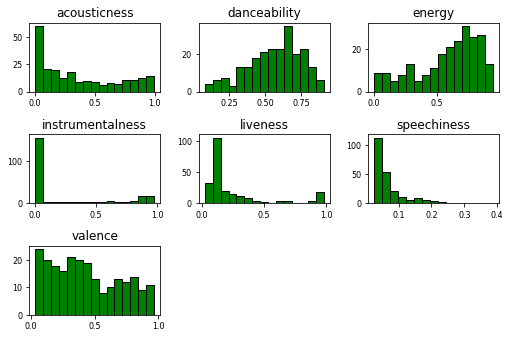

In [29]:
#Visualizing data in One Dimension (1-D) thanks to histogram. Here, we are 
# only concerned with analyzing one data attribute or variable and visualizing the same (one dimension)

all_feats.hist(bins=15, color='green', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))    

#Conclusion: The plots give a good idea of data distribution of each feature. 


Exploration of correlation between audiofeatures

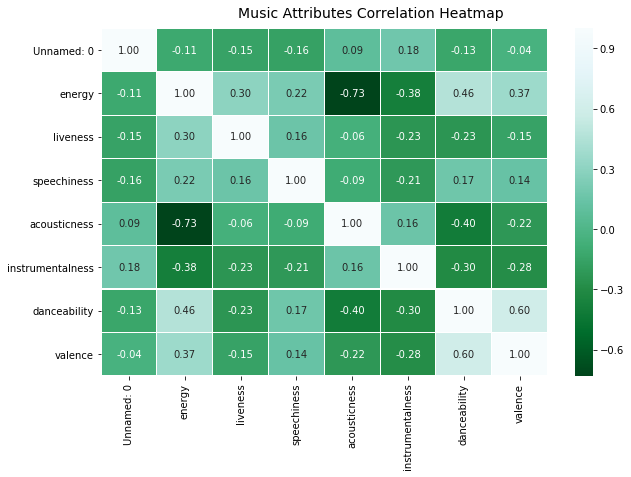

In [30]:
#Visualizing data in Two Dimensions (2-D):  Let's now check out potential relationships 
# or correlations amongst the different data attributes

# The pair-wise Correlation Matrix Heatmap

f, ax = plt.subplots(figsize=(10, 6))
corr = audiofeats.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="BuGn_r",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Music Attributes Correlation Heatmap', fontsize=14)

#Conclusion : Acoustiness and Energy seems to be negatively correlated.

Acoustiness and Energy seem to be negatively correlated

# CLEANING

In [40]:
#We are dropping the non-integer type variables
audiofeats = all_feats.drop(['uri','artist','song_names'], axis=1)

#We are dropping the acousticness variable because it is negatively correlated with energy
audiofeats = audiofeats.drop('acousticness', axis=1)

#We convert the dataset into a numpy array in order to perform scaling# WHY ?
audio_array = np.array(audiofeats)

#Scale : Transforms features by scaling each feature to a given range.

mms = MinMaxScaler()
mms.fit(audio_array)
audio_array_scaled = mms.transform(audio_array)

# CLUSTERING

Using clustering algorithms to uncover patterns in the data

Finding the number of clusters - Elbow Method

{'Number of cluster': 1}
{'Model Inertia Value': 98.50617668135888}
{'Number of cluster': 2}
{'Model Inertia Value': 64.7197832804556}
{'Number of cluster': 3}
{'Model Inertia Value': 47.56794756305696}
{'Number of cluster': 4}
{'Model Inertia Value': 37.65743340316908}
{'Number of cluster': 5}
{'Model Inertia Value': 28.034624991811086}
{'Number of cluster': 6}
{'Model Inertia Value': 25.29779744483356}
{'Number of cluster': 7}
{'Model Inertia Value': 23.432027855075404}
{'Number of cluster': 8}
{'Model Inertia Value': 21.588910491714785}
{'Number of cluster': 9}
{'Model Inertia Value': 19.62206623136028}


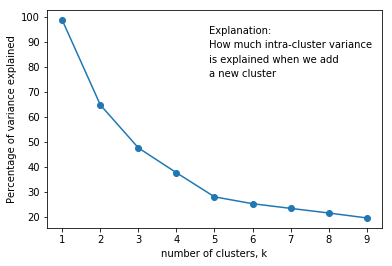

In [41]:
#If you graph the percentage of variance explained by 
#the clusters against the number of clusters, the first clusters will 
#add much information (explain a lot of variance), but at some point 
#the marginal gain will drop, giving an angle in the graph. 
#The number of clusters are chosen at this point, hence the “elbow criterion”.

ks = range(1, 10)
inertias = []

def number_of_clusters():
    
    for k in ks:
        model = KMeans(n_clusters=k, random_state=None)
        model.fit(audio_array_scaled)
        inertias.append(model.inertia_)
        print({"Number of cluster":k})
        print({"Model Inertia Value":model.inertia_})
        
number_of_clusters()

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Percentage of variance explained')
plt.figtext(.5, .8, "Explanation:")
plt.figtext(.5, .75, "How much intra-cluster variance")
plt.figtext(.5, .7, "is explained when we add")
plt.figtext(.5, .65, "a new cluster")
plt.xticks(ks)
plt.show()

#Inertia refers to within-cluster sum-of-squares of all clusters. 
#Then show how well packed the clusters. 
#Our goal is to  


We can see there is no a significant different after 5 clusters. The Elbow method suggests that 5 is the optimal number of clusters.

Finding the number of clusters - Silhouette Analysis

For n_clusters = 4 The average silhouette_score is : 0.39618221559391803
For n_clusters = 5 The average silhouette_score is : 0.3688267499429346
For n_clusters = 6 The average silhouette_score is : 0.34366264241003364


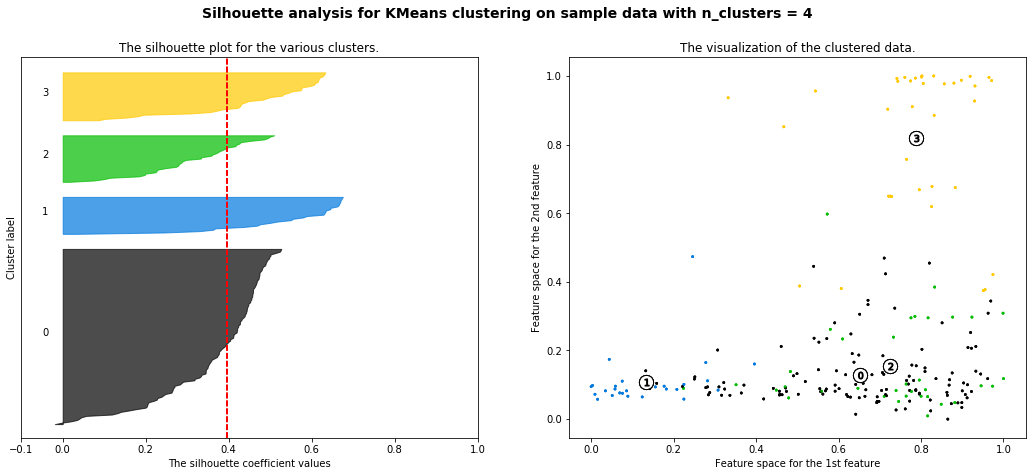

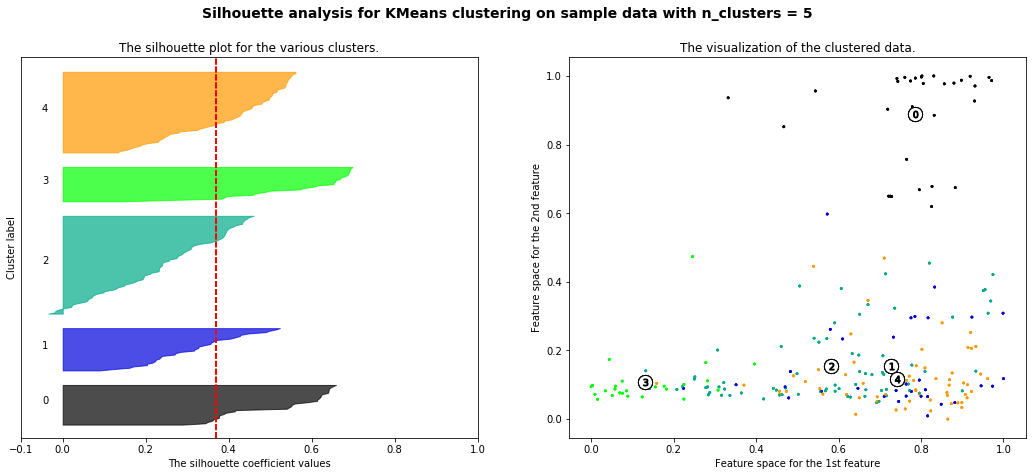

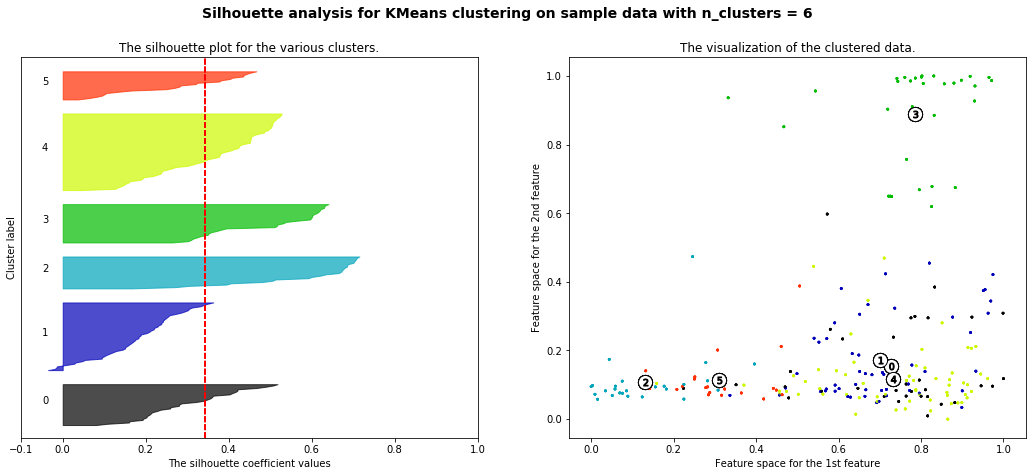

ValueError: shape mismatch: objects cannot be broadcast to a single shape

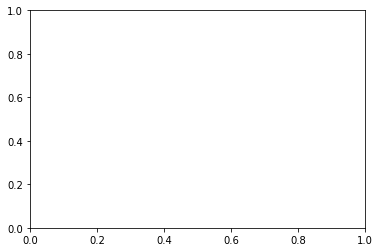

In [42]:
#Silhouette coefficients near +1 indicate that the sample is far away from the
#neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision 
#boundary between two neighboring clusters and negative values indicate that those samples 
#might have been assigned to the wrong cluster.
#
#Avg Silhouette score: I get the average Silhouette score of the cluster k.
#Silhouette samples score: And, for all the samples belonging to a given cluster 
#(from 1 to k), I calculate the individual silhouette score of each sample belong 
#to that cluster.

# Important #

#Negative values means that they are not in the right cluster since they might
#be closer to other centroids from other clusters. 

#Then I sort the scores of all samples belonging to each cluster. 
#This is needed so that I can plot the score in an ascending order.

#s(i) = {b(i) - a(i)} / {\max\{a(i),b(i)\}}
#


#Explnation here https://www.youtube.com/watch?v=5TPldC_dC0s


range_n_clusters = [4,5,6]
scores=[]

def number_of_clusters_silhouette():
        
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
         
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(audio_array_scaled) + (n_clusters + 1) * 10])
        
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(audio_array_scaled)
        
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(audio_array_scaled, cluster_labels)
        scores.append(silhouette_avg)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
#        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(audio_array_scaled, cluster_labels)
        
#        If you want to see the values for each point of the dataset
#        print(sample_silhouette_values)
        
        y_lower = 10
        
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
#    
            ith_cluster_silhouette_values.sort()
#    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
#    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
            ax1.set_title("The silhouette plot for the various clusters.")
            ax1.set_xlabel("The silhouette coefficient values")
            ax1.set_ylabel("Cluster label")
        
            # The vertical line for average silhouette score of all the values
            ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        
            ax1.set_yticks([])  # Clear the yaxis labels / ticks
            ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
            # 2nd Plot showing the actual clusters formed
            colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
            ax2.scatter(audio_array_scaled[:, 0], audio_array_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                        c=colors, edgecolor='k')
        
            # Labeling the clusters
            centers = clusterer.cluster_centers_
            # Draw white circles at cluster centers
            ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
        
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
            ax2.set_title("The visualization of the clustered data.")
            ax2.set_xlabel("Feature space for the 1st feature")
            ax2.set_ylabel("Feature space for the 2nd feature")
    
            plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')


    plt.show()
    
    plt.figure()
    plt.bar(range(n_clusters), scores, width=0.6, color="k", align="center")
    plt.title("Silhouette scores vs number of clusters")
        
    
number_of_clusters_silhouette()

In [43]:
model = KMeans(n_clusters=4, init="k-means++", n_init=10, precompute_distances = True).fit(audio_array_scaled)
labels = model.fit_predict(audio_array_scaled)


# VISUALIZATION

2D Visualization

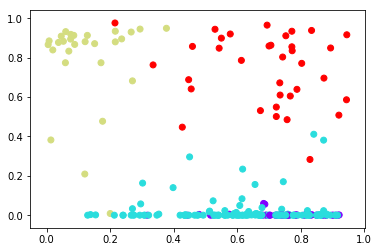

In [45]:
#We can use scatter plot in 2D with colors to visualize the clusters produced by our model
#Our clustering was based on 6 features, however 2D only allows us to plot the data points against 
#2 axes. 
#Picking random variables (energy, instrumentalness) for the x and y axes doesn´t allow us to produce a clear 
#visual representation of the clusters 

plt.scatter(x=audiofeats.energy,y=audiofeats.instrumentalness, c=model.labels_, cmap='rainbow')

In [46]:
#In order to have a better visual representation we want to choose the variables that explain 
#most of the variance as the x and y axes
#Let´s look at the distribution of the variables amongst the different clusters

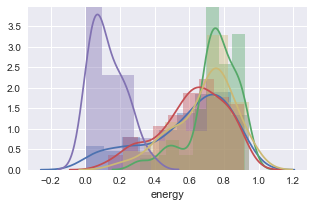

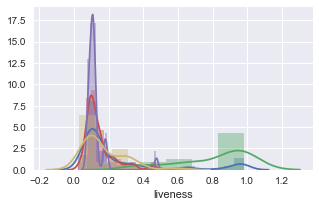

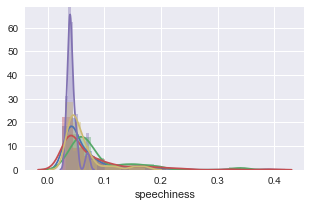

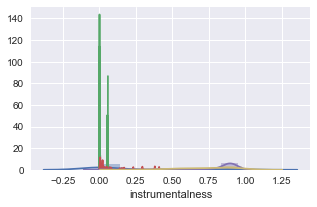

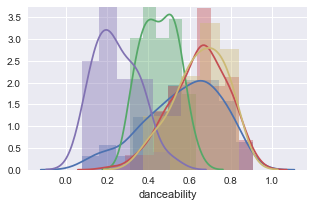

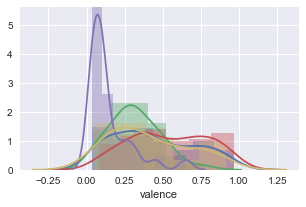

In [64]:
audiofeats['cluster'] = model.labels_

c1= audiofeats.loc[audiofeats['cluster'] == 0]
c2= audiofeats.loc[audiofeats['cluster'] == 1]
c3= audiofeats.loc[audiofeats['cluster'] == 2]
c4= audiofeats.loc[audiofeats['cluster'] == 3]

import warnings; warnings.simplefilter('ignore')

sns.set(rc={'figure.figsize':(5,3)})

sns.distplot(audiofeats['energy'])
sns.distplot(c1['energy'])
sns.distplot(c2['energy'])
sns.distplot(c3['energy'])
sns.distplot(c4['energy'])
plt.show()

sns.distplot(audiofeats['liveness'])
sns.distplot(c1['liveness'])
sns.distplot(c2['liveness'])
sns.distplot(c3['liveness'])
sns.distplot(c4['liveness'])
plt.show()

sns.distplot(audiofeats['speechiness'])
sns.distplot(c1['speechiness'])
sns.distplot(c2['speechiness'])
sns.distplot(c3['speechiness'])
sns.distplot(c4['speechiness'])
plt.show()

sns.distplot(audiofeats['instrumentalness'])
sns.distplot(c1['instrumentalness'])
sns.distplot(c2['instrumentalness'])
sns.distplot(c3['instrumentalness'])
sns.distplot(c4['instrumentalness'])
plt.show()

sns.distplot(audiofeats['danceability'])
sns.distplot(c1['danceability'])
sns.distplot(c2['danceability'])
sns.distplot(c3['danceability'])
sns.distplot(c4['danceability'])
plt.show()

sns.distplot(audiofeats['valence'])
sns.distplot(c1['valence'])
sns.distplot(c2['valence'])
sns.distplot(c3['valence'])
sns.distplot(c4['valence'])
plt.show()


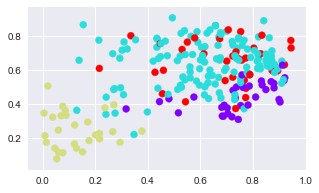

In [66]:
#Energy & Dancability have the greatest variance amongst clusters
#Let´s use scatter plot with these two axes

plt.scatter(x=audiofeats.energy,y=audiofeats.danceability, c=model.labels_, cmap='rainbow')

3D Visualization

In [ ]:
#Plotted against energy and danceability, our clusters appear more clearly. However, valence also 
#appears to have a quite high variance. Let´s to try to plot using 3D.

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

audio_3d = np.array((audiofeats).astype(float))

#

#kmeans = KMeans(n_clusters=4)  
#kmeans.fit(spot1)

sns.set(rc={'figure.figsize':(7,7)})

X = audio_3d[:,1]       #energy
Y = audio_3d[:,5]       #danceability
Z = audio_3d[:,6]       #valence

#ax.scatter(X, Y, Z, c='r', marker='o')
ax.scatter(X, Y, Z, c=model.labels_, cmap='rainbow', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# INTERPRETATION

In [86]:
#We merge the audiofeats dataset back with the non-interger type data containing track info.
#Let´s look at the songs that are clustered together.

audiofeats['cluster'] = model.labels_
audio_withinfo = audiofeats.merge(all_feats[['artist','song_names']], left_index=True, right_index=True)

c1= audio_withinfo.loc[audiofeats['cluster'] == 0]
c2= audio_withinfo.loc[audiofeats['cluster'] == 1]
c3= audio_withinfo.loc[audiofeats['cluster'] == 2]
c4= audio_withinfo.loc[audiofeats['cluster'] == 3]

print(c1[['artist','song_names']].head(10))
print(c2[['artist','song_names']].head(10))
print(c3[['artist','song_names']].head(10))
print(c4[['artist','song_names']].head(10))

     artist                                song_names
2   Justice                      Safe and Sound (WWW)
3   Justice                          D.A.N.C.E. (WWW)
4   Justice                 Canon x Love S.O.S. (WWW)
7   Justice                  Heavy Metal x DVNO (WWW)
8   Justice                              Stress (WWW)
9   Justice                         Love S.O.S. (WWW)
10  Justice                   Alakazam ! x Fire (WWW)
15  Justice                               Randy (WWW)
16  Justice  D.A.N.C.E. x Fire x Safe and Sound (WWW)
17  Justice                               Randy (WWW)
                  artist                                         song_names
6                Justice            Pleasure x Newjack x Civilization (WWW)
11               Justice  Waters of Nazareth x We Are your Friends x Pha...
14               Justice                                         Stop (WWW)
18               Justice                            Stop (WWW) - Radio Edit
20              Four Tet  